In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_eda = pd.read_csv('df_peliculas.csv')

- rentabilidad X
- outlier en actores
- outliers en directores 
- correlaciones X
- genero con mas ingresos
- genero mas rentable
- director mas rentable
- actor mas rentable

In [14]:
df_eda['return'].describe() 

count    5.381000e+03
mean     5.565899e+03
std      2.168566e+05
min      5.217391e-07
25%      7.870443e-01
50%      2.056683e+00
75%      4.244444e+00
max      1.239638e+07
Name: return, dtype: float64

La columna "return", que representa la rentabilidad, probablemente sea la característica más crucial en nuestro análisis. Sin embargo, su dispersión es significativa, lo que dificulta la identificación de patrones claros. Un aspecto crucial a tener en cuenta es que aproximadamente el 25% de los datos tiene un valor de cero en esta columna. Para abordar esta limitación, una estrategia efectiva podría ser la eliminación de las filas que presentan valores faltantes en las columnas de presupuesto, ingresos y rentabilidad. Esta acción no solo contribuiría a la mejora de la calidad del conjunto de datos, sino que también reduciría considerablemente la presencia de valores atípicos que que casi con seguridad son producto de datos inexactos o incorrectos.

In [3]:
df_eda = df_eda[(df_eda['budget'] != 0) & (df_eda['revenue'] != 0) & (df_eda['return'] != 0)]
df_eda = df_eda.dropna(subset=['budget', 'revenue', 'return'])
df_eda = df_eda.reset_index(drop=True)

In [20]:
df_eda['return'].max()

12396383.0

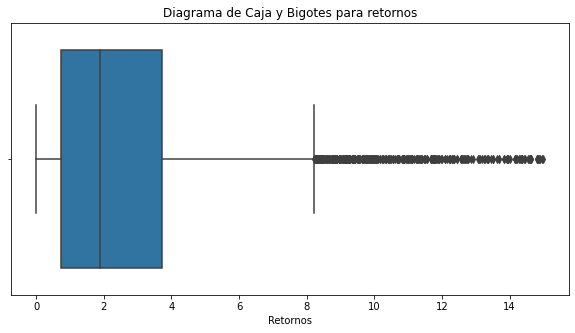

In [19]:
data = df_eda['return']

plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=data[data < 15], orient='h')
plt.title('Diagrama de Caja y Bigotes para retornos')
plt.xlabel('Retornos')

plt.show()

El gráfico nos brinda información valiosa: el rango intercuartil abarca desde 0.8x hasta 4x. La mediana se encuentra de 2x; considerando que la columna "budget" solo refleja los costos de producción y no abarca los gastos de marketing, que en algunos casos pueden ser comparables o incluso superar los costos de producción, especialmente en producciones a gran escala. La mediana de retornos en 2 sugiere que aproximadamente la mitad de las producciones cinematográficas pueden no recuperar su inversión inicial. No obstante, observando la extensión del rango intercuartil y el bigote en el lado derecho, junto con la presencia de numerosos valores atípicos de este lado de la mediana, se hace evidente que existe la posibilidad de compensar las pérdidas de las producciones menos exitosas con aquellas que logran un alto grado de rentabilidad. Este patrón subraya la importancia de crear un portafolio diversificado de producciones, donde el éxito de unas pocas películas altamente rentables pueda contrarrestar las posibles pérdidas de otras, generando un equilibrio financiero en la industria cinematográfica.

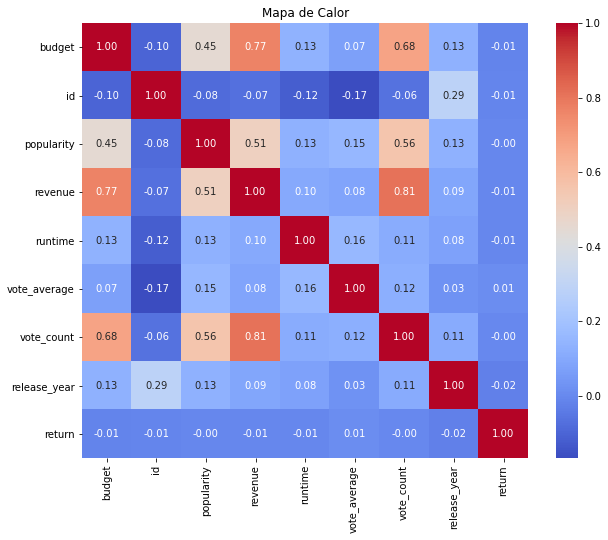

In [10]:
def columna_numerica(columna):
    return pd.api.types.is_numeric_dtype(columna)
columnas_numericas = [col for col in df_eda.columns if columna_numerica(df_eda[col])]
mascara_numerica = df_eda[columnas_numericas]
matriz_correlacion = mascara_numerica.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor')
plt.show()

El mapa de calor revela las relaciones entre variables numéricas en el conjunto de datos de películas. En particular, se destaca una correlación significativa entre el presupuesto de producción y los ingresos generados por las películas. Esta fuerte correlación sugiere que las producciones cinematográficas de gran envergadura tienden a ser financieramente más beneficiosas. Sin embargo, es crucial reconocer que la evaluación de la rentabilidad no puede basarse únicamente en los ingresos; es imperativo realizar un análisis más profundo de la relación entre el presupuesto y la rentabilidad para respaldar esta conclusión. 
La correlación entre la popularidad de una película, la cantidad de votos y los votos positivos nos indica una posible medición de un mismo fenómeno, por lo cual no debería usarse mas de una de estas columnas para un modelo de aprendizaje o regresión pues podria conllevar a sobreajuste (overfitting)

In [21]:
df_eda.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return', 'franquicia', 'paises',
       'productoras', 'directores'],
      dtype='object')

In [16]:
import ast
df_eda['genero_principal'] = df_eda['genres'].apply(lambda x: ast.literal_eval(x)[0]['name'] if len(ast.literal_eval(x)) > 0 else None)

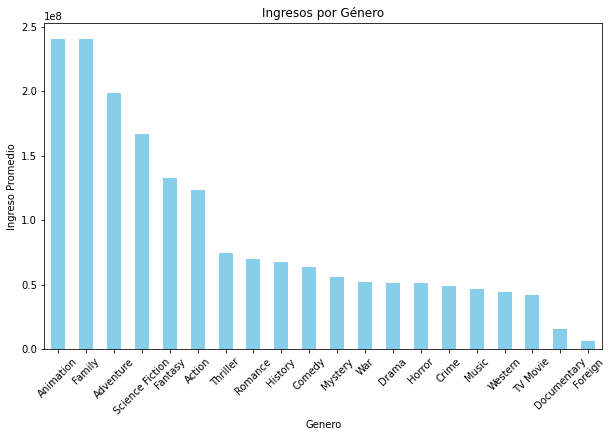

In [19]:
ingresos_por_genero = df_eda.groupby('genero_principal')['revenue'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
ingresos_por_genero.plot(kind='bar', color='skyblue')
plt.title('Ingresos por Género')
plt.xlabel('Genero')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=45)
plt.show()








Al analizar el primer género enlistado para cada película y asumiendo que este primer género refleja el género principal, se observa que el género "Animación" es el que registra los ingresos más elevados en promedio. Por otro lado, se evidencia que los géneros "Documental" y "Películas Extranjeras" son los que generan menores ingresos en comparación. Esta tendencia podría sugerir que las películas de animación tienen un atractivo significativo para el público y tienden a tener un rendimiento financiero superior, mientras que los documentales y las películas extranjeras podrían enfrentar desafíos en términos de generación de ingresos.